In [5]:
# Importing libraries
import matplotlib.pyplot as plt
import math
import numpy as np
import os

In [6]:
# Function for error calculation
def error(weights, inputs, outputs):
    prediction = 1 / (1 + np.exp(-(np.dot(inputs, weights))))
    return np.sum(np.abs(outputs - prediction))

In [7]:
# Simulated-Annealing Algorithm
def simulatedAnnealing(inputs, outputs, initWeight, initTemp, cooling, iterations):
    weight = initWeight
    optimalWeight = weight
    temp = initTemp
    bestError = error(weight, inputs, outputs)

    # Track values for plotting
    tempValues = []
    deltaValues = []
    errorValues = []
    
    for i in range(iterations):
        updatedWeight = weight + np.random.uniform(-0.1, 0.1, size = weight.shape)
        updatedError = error(updatedWeight, inputs, outputs)

        tempValues.append(temp)
        deltaValues.append(updatedError - bestError)
        errorValues.append(bestError)
        
        changeInError = updatedError - bestError
        if changeInError < 0:
            weight = updatedWeight
            bestError = updatedError
        else:
            if np.random.rand() < math.exp(-changeInError/temp):
                weight = updatedWeight
                bestError = updatedError
        
        temp *= cooling
        
        if i % 100 == 0:
            print(f"Iteration: {i} , Error: {bestError}, Temperature: {temp}")

    return weight, bestError, tempValues, deltaValues, errorValues

# Creating the OR gate
inputs = np.array([(0, 0), (0, 1), (1, 0), (1, 1)])
outputs = np.array([0, 1, 1, 1 ])

horizontalStack = np.hstack([inputs, np.ones((inputs.shape[0], 1))])

# Creating weights
initWeight = np.random.uniform(-1, 1, 3)

# SA variables
initTemp = 100
cooling = 0.99
iteration = 1000

# Running SA function
OptimalWeight, bestError, tempValues, deltaValues, errorValues = simulatedAnnealing(horizontalStack, outputs, initWeight, initTemp, cooling, iteration)
print(f"OptimalW: {OptimalWeight}")
print(f"Best Error: {bestError}")

Iteration: 0 , Error: 1.3988193507795383, Temperature: 99.0
Iteration: 100 , Error: 1.249922427680472, Temperature: 36.23720178604971
Iteration: 200 , Error: 1.6958321153345237, Temperature: 13.263987810938206
Iteration: 300 , Error: 2.346562887282091, Temperature: 4.8550485130572865
Iteration: 400 , Error: 2.1561904735736537, Temperature: 1.7771047742294686
Iteration: 500 , Error: 2.2076392639383156, Temperature: 0.6504778211990457
Iteration: 600 , Error: 1.8390100111803667, Temperature: 0.23809591983979556
Iteration: 700 , Error: 1.6112363329001855, Temperature: 0.08715080698656348
Iteration: 800 , Error: 1.2592569533091789, Temperature: 0.031900013925143154
Iteration: 900 , Error: 0.9234263316143324, Temperature: 0.011676436783668767
OptimalW: [ 2.09405121  3.92324662 -0.45400181]
Best Error: 0.5848896069609817


NameError: name '__file__' is not defined

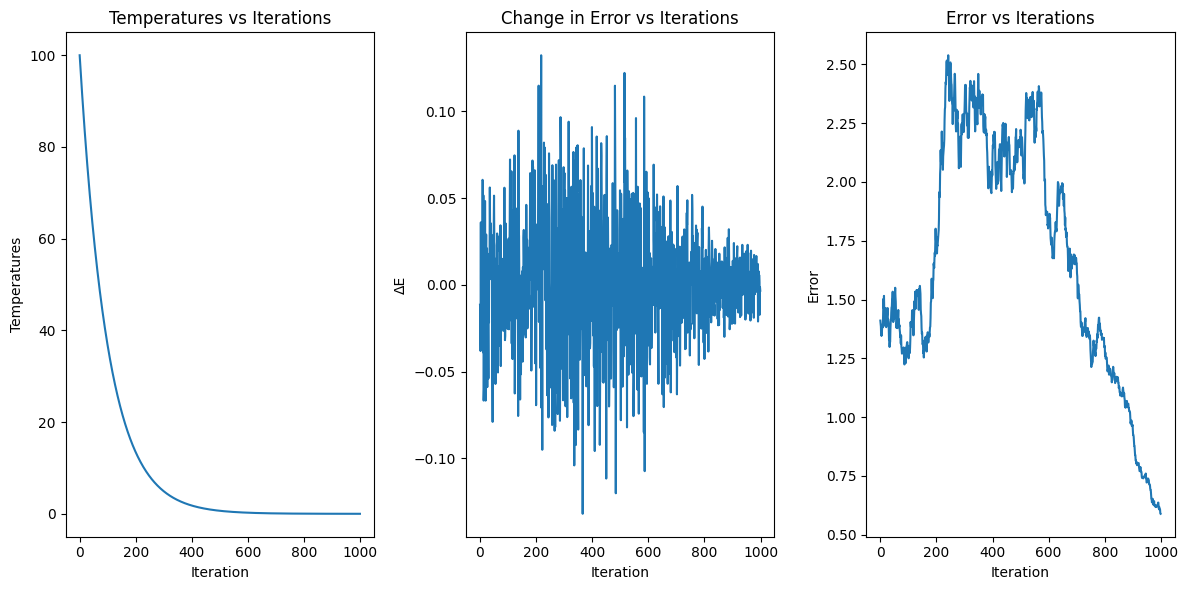

In [8]:
# Plot the values of temperate, delta E, and value of the objective function over iterations
plt.figure(figsize=(12, 6))

# Plotting temperatures vs iterations
plt.subplot(1, 3, 1)
plt.plot(tempValues)
plt.title("Temperatures vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Temperatures")

# Plotting deltaValues vs iterations
plt.subplot(1, 3, 2)
plt.plot(deltaValues)
plt.title("Change in Error vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("ΔE")

# Plotting error values vs iterations
plt.subplot(1, 3, 3)
plt.plot(errorValues)
plt.title("Error vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Error")

# Show graphs
plt.tight_layout()
plt.show

script_dir = os.path.dirname(os.path.abspath(__file__))
file_path = os.path.join(script_dir, "OverIterations.png")
plt.savefig(file_path, dpi=300)